In [1045]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [1046]:
data= pd.read_csv("B.P Texas.csv")
data.head(10)


,PV,TC,LAL,LAH-1,LAH-2,V-6,RV-4,"RV-1,2,3",Output
0,Normal,Low,Normal,Normal,Normal,Normal,Normal,Normal,Low risk
1,Normal,Low,Normal,Normal,Normal,Normal,Normal,Medium,Low risk
2,Normal,Low,Normal,Normal,Normal,Normal,Normal,Fail,Medium risk
3,Normal,Low,Normal,Normal,Normal,Normal,Medium,Normal,Low risk
4,Normal,Low,Normal,Normal,Normal,Normal,Medium,Medium,Medium risk
5,Normal,Low,Normal,Normal,Normal,Normal,Medium,Fail,Medium risk
6,Normal,Low,Normal,Normal,Normal,Medium,Fail,Normal,Medium risk
7,Normal,Low,Normal,Normal,Normal,Medium,Fail,Medium,Medium risk
8,Normal,Low,Normal,Normal,Normal,Medium,Fail,Fail,High risk
9,Normal,Low,Normal,Normal,Medium,Medium,Normal,Normal,Medium risk


In [1047]:
data.tail(20)

,PV,TC,LAL,LAH-1,LAH-2,V-6,RV-4,"RV-1,2,3",Output
1922,Fail,Fail,Fail,Medium,Normal,Fail,Fail,Medium,Emergency
1923,Fail,Fail,Fail,Medium,Normal,Fail,Fail,Fail,Emergency
1924,Fail,Fail,Fail,Fail,Medium,Normal,Normal,Normal,Emergency
1925,Fail,Fail,Fail,Fail,Medium,Normal,Normal,Medium,Emergency
1926,Fail,Fail,Fail,Fail,Medium,Normal,Normal,Fail,Emergency
1927,Fail,Fail,Fail,Fail,Medium,Normal,Medium,Normal,Emergency
1928,Fail,Fail,Fail,Fail,Medium,Normal,Medium,Medium,Emergency
1929,Fail,Fail,Fail,Fail,Medium,Normal,Medium,Fail,Emergency
1930,Fail,Fail,Fail,Fail,Medium,Medium,Fail,Normal,Emergency
1931,Fail,Fail,Fail,Fail,Medium,Medium,Fail,Medium,Emergency


In [1048]:
Output= data.Output
Output

0          Low risk
1          Low risk
2       Medium risk
3          Low risk
4       Medium risk
           ...     
1937      Emergency
1938      Emergency
1939      Emergency
1940      Emergency
1941      Emergency
Name: Output, Length: 1942, dtype: object

In [1049]:
data. dtypes

PV          object
TC          object
LAL         object
LAH-1       object
LAH-2       object
V-6         object
RV-4        object
RV-1,2,3    object
Output      object
dtype: object

In [1050]:
#dealing with missing values
data.dropna(inplace= True)
data.isnull().sum()

PV          0
TC          0
LAL         0
LAH-1       0
LAH-2       0
V-6         0
RV-4        0
RV-1,2,3    0
Output      0
dtype: int64

In [1051]:
data.head(10)



,PV,TC,LAL,LAH-1,LAH-2,V-6,RV-4,"RV-1,2,3",Output
0,Normal,Low,Normal,Normal,Normal,Normal,Normal,Normal,Low risk
1,Normal,Low,Normal,Normal,Normal,Normal,Normal,Medium,Low risk
2,Normal,Low,Normal,Normal,Normal,Normal,Normal,Fail,Medium risk
3,Normal,Low,Normal,Normal,Normal,Normal,Medium,Normal,Low risk
4,Normal,Low,Normal,Normal,Normal,Normal,Medium,Medium,Medium risk
5,Normal,Low,Normal,Normal,Normal,Normal,Medium,Fail,Medium risk
6,Normal,Low,Normal,Normal,Normal,Medium,Fail,Normal,Medium risk
7,Normal,Low,Normal,Normal,Normal,Medium,Fail,Medium,Medium risk
8,Normal,Low,Normal,Normal,Normal,Medium,Fail,Fail,High risk
9,Normal,Low,Normal,Normal,Medium,Medium,Normal,Normal,Medium risk


In [1052]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 1941
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PV        1940 non-null   object
 1   TC        1940 non-null   object
 2   LAL       1940 non-null   object
 3   LAH-1     1940 non-null   object
 4   LAH-2     1940 non-null   object
 5   V-6       1940 non-null   object
 6   RV-4      1940 non-null   object
 7   RV-1,2,3  1940 non-null   object
 8   Output    1940 non-null   object
dtypes: object(9)
memory usage: 151.6+ KB


In [1053]:
data.count()

PV          1940
TC          1940
LAL         1940
LAH-1       1940
LAH-2       1940
V-6         1940
RV-4        1940
RV-1,2,3    1940
Output      1940
dtype: int64

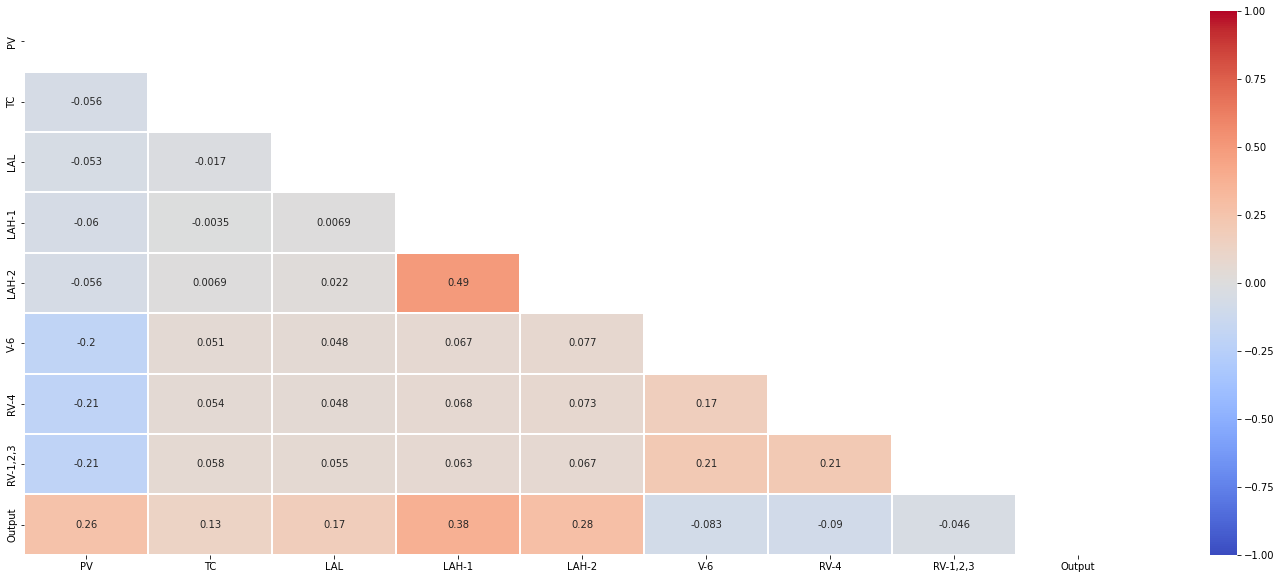

In [1054]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


In [1055]:
data.head(10)

,PV,TC,LAL,LAH-1,LAH-2,V-6,RV-4,"RV-1,2,3",Output
0,Normal,Low,Normal,Normal,Normal,Normal,Normal,Normal,Low risk
1,Normal,Low,Normal,Normal,Normal,Normal,Normal,Medium,Low risk
2,Normal,Low,Normal,Normal,Normal,Normal,Normal,Fail,Medium risk
3,Normal,Low,Normal,Normal,Normal,Normal,Medium,Normal,Low risk
4,Normal,Low,Normal,Normal,Normal,Normal,Medium,Medium,Medium risk
5,Normal,Low,Normal,Normal,Normal,Normal,Medium,Fail,Medium risk
6,Normal,Low,Normal,Normal,Normal,Medium,Fail,Normal,Medium risk
7,Normal,Low,Normal,Normal,Normal,Medium,Fail,Medium,Medium risk
8,Normal,Low,Normal,Normal,Normal,Medium,Fail,Fail,High risk
9,Normal,Low,Normal,Normal,Medium,Medium,Normal,Normal,Medium risk


In [1056]:
Output= data.Output
Output


0          Low risk
1          Low risk
2       Medium risk
3          Low risk
4       Medium risk
           ...     
1937      Emergency
1938      Emergency
1939      Emergency
1940      Emergency
1941      Emergency
Name: Output, Length: 1940, dtype: object

In [1057]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Output']= label_encoder.fit_transform(data['Output'])

In [1058]:
categorical_variable = ['PV','TC','LAL','LAH-1','LAH-2','V-6','RV-4','RV-1,2,3']
data= pd.get_dummies(data, columns=categorical_variable)
data.head(10)

,Output,PV_Fail,PV_Medium,PV_Normal,PV_Normal,TC_Fail,TC_Low,TC_Low,TC_Medium,LAL_Fail,...,V-6_Normal,V-6_Normal,RV-4_Fail,RV-4_Medium,RV-4_Normal,RV-4_Normal,"RV-1,2,3_Fail","RV-1,2,3_Medium","RV-1,2,3_Normal","RV-1,2,3_Normal"
0,3,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,3,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,5,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,3,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,5,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
5,5,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
6,5,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7,5,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,2,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
9,5,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1059]:
data.tail(10)

,Output,PV_Fail,PV_Medium,PV_Normal,PV_Normal,TC_Fail,TC_Low,TC_Low,TC_Medium,LAL_Fail,...,V-6_Normal,V-6_Normal,RV-4_Fail,RV-4_Medium,RV-4_Normal,RV-4_Normal,"RV-1,2,3_Fail","RV-1,2,3_Medium","RV-1,2,3_Normal","RV-1,2,3_Normal"
1932,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1933,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1934,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1935,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1936,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1937,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1938,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1939,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1940,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1941,1,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [1060]:
#Extracting the independent from the target variable and converting into a numpy arrat

x= data.drop(columns=['Output'],axis=1)
y= data['Output'].values

In [1061]:
#perfroming a train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(y_test.shape)
print(X_train.shape)

(582,)
(1358, 32)


In [1062]:
print(X_train)

      PV_Fail  PV_Medium  PV_Normal  PV_Normal   TC_Fail  TC_Low  TC_Low   \
142         0          0          0           1        0       0        1   
664         0          1          0           0        0       0        0   
824         0          1          0           0        1       0        0   
913         0          1          0           0        1       0        0   
1289        1          0          0           0        0       0        0   
...       ...        ...        ...         ...      ...     ...      ...   
1793        1          0          0           0        1       0        0   
1096        1          0          0           0        0       0        1   
1934        1          0          0           0        1       0        0   
235         0          0          0           1        0       0        0   
1061        1          0          0           0        0       0        1   

      TC_Medium  LAL_Fail  LAL_Medium  ...  V-6_Normal  V-6_Normal   \
142 

In [1063]:
# #scaling the data
# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaled_x_train = np.array(X_train).reshape(len(X_train),45)
# scaled_x_train = scaler.fit_transform(scaled_x_train)
# scaled_x_test = np.array(X_test).reshape(len(X_test),45)
# scaled_x_test = scaler.transform(scaled_x_test)
# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

# scaler = MinMaxScaler()
# scaled_x_train = scaler.fit_transform(X_train)
# scaled_x_test = scaler.fit_transform(X_test)
# scaled_y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
# scaled_y_test = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [1064]:
#Random Forest

rfr_model = RandomForestClassifier(n_estimators=200)
rfr_model.fit(X_train, y_train)
#rfr_prediction = rfr_model.predict(scaled_x_train)

RandomForestClassifier(n_estimators=200)

In [1065]:

cv_rfr = cross_val_score(estimator = rfr_model, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_rfr.mean())

y_pred_rfr_train =rfr_model.predict(X_train)
accuracy_rfc_train = accuracy_score(y_train, y_pred_rfr_train)
print("Training set: ", accuracy_rfc_train)

y_pred_rfr_test = rfr_model.predict(X_test)
accuracy_rfr_test = accuracy_score(y_test, y_pred_rfr_test)
print("Test set: ", accuracy_rfr_test)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


CV:  0.8777668845315905
Training set:  0.9992636229749632
Test set:  0.8917525773195877


In [1066]:
confusion_matrix(y_test,  y_pred_rfr_test)
class_report = classification_report(y_test,  y_pred_rfr_test)
print('Report of Classification;\n', class_report)

Report of Classification;
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.93      0.91       292
           2       0.90      0.87      0.88       269
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         1
           5       0.86      0.75      0.80        16

    accuracy                           0.89       582
   macro avg       0.61      0.59      0.60       582
weighted avg       0.89      0.89      0.89       582



C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_


CONFUSION MATRIX


<AxesSubplot:>

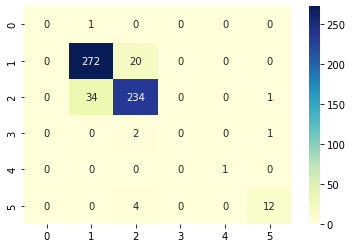

In [1067]:
con_mat = confusion_matrix(y_test,y_pred_rfr_test)

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [1068]:
#Logistic Regression

lr= LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1069]:
#prediction
cv_lr = cross_val_score(estimator=lr, X= X_train, y= y_train, cv = 10)
print('CV:', cv_lr.mean())

y_pred_lr_train = lr.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_lr_train)
print('Training set:', accuracy_train)

y_pred_lr_test = lr.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_lr_test)
print('Test set:', accuracy_test)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

CV: 0.8085185185185185
Training set: 0.8232695139911634
Test set: 0.8213058419243986


C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1070]:
confusion_matrix(y_test,  y_pred_lr_test)
class_report = classification_report(y_test,  y_pred_lr_test)
print('Report of Classification;\n', class_report)

Report of Classification;
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      0.90      0.86       292
           2       0.84      0.78      0.81       269
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.55      0.38      0.44        16

    accuracy                           0.82       582
   macro avg       0.37      0.34      0.35       582
weighted avg       0.81      0.82      0.82       582



C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [1071]:
#decision tree

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [1072]:
#prediction
cv_dt = cross_val_score(estimator=dt_model, X= X_train, y= y_train, cv = 10)
print('CV:', cv_dt.mean())

y_pred_dt_train = dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_dt_train)
print('Training set:', accuracy_train)

y_pred_dt_test = dt_model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_dt_test)
print('Test set:', accuracy_test)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


CV: 0.8571132897603485
Training set: 0.9992636229749632
Test set: 0.8883161512027491


In [1073]:
confusion_matrix(y_test,  y_pred_dt_test)
class_report = classification_report(y_test,  y_pred_dt_test)
print('Report of Classification;\n', class_report)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report of Classification;
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.92      0.90       292
           2       0.90      0.87      0.89       269
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         1
           5       0.81      0.81      0.81        16

    accuracy                           0.89       582
   macro avg       0.52      0.60      0.54       582
weighted avg       0.88      0.89      0.89       582



C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1074]:
#Naivebayes

In [1075]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [1076]:
cv_NB = cross_val_score(estimator= nb_model, X= X_train, y= y_train, cv = 10)
print('CV:', cv_NB.mean())

y_pred_nb_train = nb_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_nb_train)
print('Training set:', accuracy_train)

y_pred_nb_test = nb_model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_nb_test)
print('Test set:', accuracy_test)

C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


CV: 0.6428649237472767
Training set: 0.6516936671575847
Test set: 0.6443298969072165


In [1077]:
confusion_matrix(y_test,  y_pred_nb_test)
class_report = classification_report(y_test,  y_pred_nb_test)
print('Report of Classification;\n', class_report)

Report of Classification;
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.82      0.74      0.78       292
           2       0.73      0.53      0.61       269
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         1
           5       0.12      0.94      0.22        16

    accuracy                           0.64       582
   macro avg       0.36      0.53      0.38       582
weighted avg       0.75      0.64      0.68       582



C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nudou\PycharmProjects\pythonProject\Practice\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_


CONFUSION MATRIX


<AxesSubplot:>

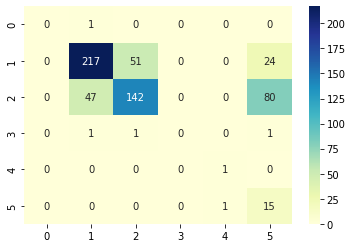

In [1078]:
con_mat = confusion_matrix(y_test,y_pred_nb_test)

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")